## 4.3　交互作用と多項式

In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

### ビニング

In [3]:
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [4]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


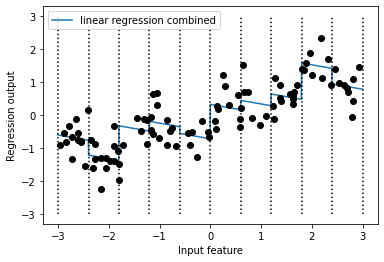

In [5]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='upper left')

In [6]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


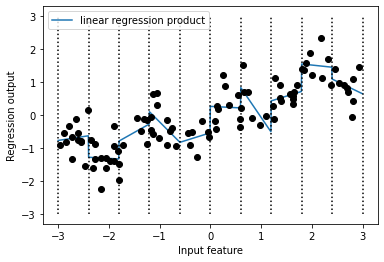

In [7]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='upper left')

### 交互作用と多項式

In [8]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print('X_poly.shape: {}'.format(X_poly.shape))

X_poly.shape: (100, 10)


In [9]:
a = pd.DataFrame(X)
a.columns = ['x0']
a.head()

,x0
0,-0.752759
1,2.704286
2,1.391964
3,0.591951
4,-2.063888


In [10]:
b = pd.DataFrame(X_poly)
b.columns = poly.get_feature_names_out()
b.head()

,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9,x0^10
0,-0.752759,0.566647,-0.426548,0.321088,-0.241702,0.181944,-0.136960,0.103098,-0.077608,0.058420
1,2.704286,7.313162,19.776880,53.482337,144.631526,391.124988,1057.713767,2860.360362,7735.232021,20918.278410
2,1.391964,1.937563,2.697017,3.754150,5.225640,7.273901,10.125005,14.093639,19.617834,27.307312
3,0.591951,0.350406,0.207423,0.122784,0.072682,0.043024,0.025468,0.015076,0.008924,0.005283
4,-2.063888,4.259634,-8.791409,18.144485,-37.448187,77.288869,-159.515582,329.222321,-679.478050,1402.366700


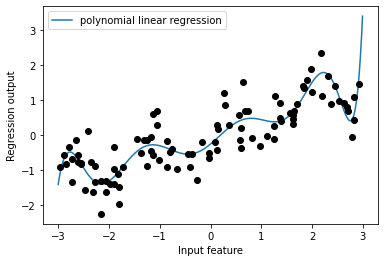

In [11]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

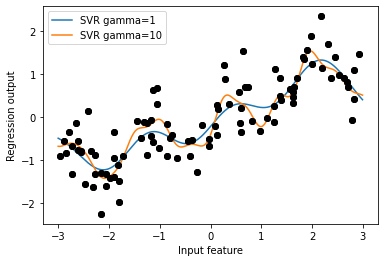

In [12]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    plt.plot(X[:, 0], y, 'o', c='k')
    plt.ylabel('Regression output')
    plt.xlabel('Input feature')
    plt.legend(loc='best')

### boston_housing

In [13]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(379, 13)
(127, 13)


In [16]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train_poly.shape)
print(X_test_poly.shape)

(379, 105)
(127, 105)


In [17]:
print('Polynomial feature names: \n{}'.format(poly.get_feature_names_out()))

Polynomial feature names: 
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


In [18]:
ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('Score with interactions: {:.3f}'.format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.577
Score with interactions: 0.741


In [19]:
rf = RandomForestRegressor().fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor().fit(X_train_poly, y_train)
print('Score with interactions: {:.3f}'.format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.763
Score with interactions: 0.753
